In [32]:
from bs4 import BeautifulSoup
from selenium import webdriver
import time
from selenium.webdriver.common.by import By
import pandas as pd
from selenium.webdriver.common.keys import Keys

In [45]:
options = webdriver.ChromeOptions()
options.add_argument("disable-gpu") #그래픽 성능 낮춰서 크롤링 성능 쪼금 높이기
options.add_argument("lang=ko_KR") # 사이트 주언어

driver = webdriver.Chrome(chrome_options=options)
driver.set_window_size(800, 600)

C:\Users\admin\AppData\Local\Temp\ipykernel_16000\3262268338.py:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=options)


In [46]:
Url = 'https://www.youtube.com/watch?v=PweirbWOHM8'
driver.get(Url)
time.sleep(3)

일본 첫날! 오사카 첫인상 방문
https://thecitizen.kr/bbs/board.php?bo_table=free&wr_id=216

In [47]:
# 크롤링 목표 : 해당 영상에 대한 댓글 id, 댓글 내용, 댓글의 좋아요 개수, 날짜 추출
data_list = []
# 스크롤 내리기
body = driver.find_element(By.TAG_NAME, 'body')
last_page_height = driver.execute_script("return document.documentElement.scrollHeight")
while True:
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(3)
    new_page_height = driver.execute_script("return document.documentElement.scrollHeight")
    if new_page_height == last_page_height:
        break
    last_page_height = new_page_height

try:
    driver.find_element(By.CSS_SELECTOR,"#dismiss-button > a").click()
except:
    pass
buttons = driver.find_elements(By.CSS_SELECTOR, "#more-replies > a")

time.sleep(1.5)

for button in buttons:
    driver.execute_script("arguments[0].click()", button)
    button.send_keys(Keys.ENTER)
    time.sleep(2)
    button.click()

   
# bs4 html 파싱
html_source = driver.page_source
soup = BeautifulSoup(html_source, 'html.parser')

id_list = soup.select("div#header-author > h3 > #author-text > span")
comment_list = soup.select("yt-formatted-string#content-text")

id_final = []
comment_final = []

for i in range(len(comment_list)):
    temp_id = id_list[i].text
    temp_id = temp_id.replace('\n', '')
    temp_id = temp_id.replace('\t', '')
    temp_id = temp_id.replace('    ', '')
    id_final.append(temp_id)

    temp_comment = comment_list[i].text
    temp_comment = temp_comment.replace('\n', '')
    temp_comment = temp_comment.replace('\t', '')
    temp_comment = temp_comment.replace('    ', '')
    comment_final.append(temp_comment)
    
    

pd_data = {"아이디" : id_final , "댓글 내용" : comment_final}
youtube_pd = pd.DataFrame(pd_data)

youtube_pd.to_excel('youtube.xlsx')

# 엑셀 불러와서, 영어 댓글만 거르기

In [54]:
import pandas as pd

youtube_com = pd.read_excel('youtube.xlsx')

In [55]:
youtube_com = youtube_com.drop(columns='Unnamed: 0')

In [56]:
# 결측치 제거 # 빈 문자열 
youtube_com.isnull().sum()
youtube_com = youtube_com.dropna()

In [57]:
youtube_com

,아이디,댓글 내용
0,Mike Lim,Japan is an amazing country to just explore an...
1,Kimberly H,It’s your first time in Japan?! You guys are g...
2,Anne with a Book,If convenience stores had as good food in the ...
3,winter10x06,I’m glad you love Osaka! I hope you can make i...
4,Bec George,You both look so happy to be on this adventure...
...,...,...
195,Skating Canuck,They charge you to add more spice? Spice costs...
196,Dốt Thích làm Quan,Tôi cảm ơn các vị khách nước ngoài đến việt na...
197,kamakiri0105,「大阪第一印象を訪ねる」→「大阪訪問の第一印象」以下の文章も、完全に誤訳です。日本語として成...
198,木村剛,いきなり”スーパー玉出”ですか？濃ゆい。


In [58]:
# 164번이 nan이라서 제거 되었는데 인덱스는 그대로 여서 오류 발생 
# 따라서, 인덱스를 다시 설정해준다. 
youtube_com = youtube_com.reset_index()
youtube_com.drop(columns='index', inplace=True)

https://euriion.com/?p=413175

In [59]:
# # (테스트)특수문자 제거 하기 
# import string
# input_string = youtube_com['댓글 내용'][0]
# output = input_string.translate(str.maketrans('', '', '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')) # '는 포함되게 하기 위해서 이렇게 진행 
# print(output)

# print(string.punctuation)

# # str.makestrans(원래 문자, 대체할 문자, 제외할 문자)

In [60]:
# 빈 문자열 np.nan으로 바꾸기
# import numpy as np

# for i in range(len(youtube_com['댓글 내용'])):
#     if (youtube_com['댓글 내용'][i] == '') or (youtube_com['댓글 내용'][i] == ' '):
#         youtube_com['댓글 내용'][i] = youtube_com['댓글 내용'][i].replace('',np.NaN, inplace=True)
#         youtube_com['댓글 내용'][i] = youtube_com['댓글 내용'][i].replace(' ', np.NaN, inplace=True)
#     else:
#         pass

In [ ]:
# 정규 표현식
# 댓글에 있는 모든 영어 문장을 단어로 저장 
import re
l = []
p = re.compile('[a-zA-Z0-9]+')
for i in range(len(youtube_com['댓글 내용'])):
    pp = p.findall(youtube_com['댓글 내용'][i])
    l.append(pp)
    
    
print(l)


In [62]:
# 2차원 리스트로 저장되어 있는 것을 그냥 리스트에 1차원으로 다 저장 
new = []
for i in l:
    for j in range(len(i)):
        new.append(i[j])
    

In [ ]:
# 확인 
new

In [ ]:
# 모든 문자를 소문자로 바꾸기 
# 글자 수 셀 때 소문자 대문자 구분없이 동일한 단어를 세기 위함 
word = []
for i in new:
    word.append(i.lower())
print(word)

In [65]:
# NLTK를 통해서 불용어 제거하기 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [67]:
result = []
stop_words = set(stopwords.words('english'))

for i in word:
    if i not in stop_words:
        result.append(i)
    
print("불용어 제거 전",len(word))
print("불용어 제거 후",len(result))

불용어 제거 전 5371
불용어 제거 후 2879


텍스트 마이닝
https://dheldh77.tistory.com/entry/Python-%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%A7%88%EC%9D%B4%EB%8B%9D

In [ ]:
# !pip install wordcloud

In [ ]:
# !pip install matplotlib

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import set_matplotlib_formats
from collections import Counter



In [ ]:
# 글자 수 세기 
count = Counter(result)
word = dict(count.most_common())
print(word)

In [72]:
word

{'japan': 78,
 'guys': 49,
 'great': 28,
 'video': 28,
 'food': 25,
 'love': 25,
 'osaka': 25,
 'like': 23,
 'get': 23,
 'videos': 21,
 'visit': 20,
 'eat': 19,
 'japanese': 19,
 'people': 19,
 'go': 19,
 'really': 19,
 'card': 19,
 'time': 17,
 'one': 16,
 'ramen': 16,
 'good': 15,
 'much': 15,
 'tokyo': 14,
 'see': 14,
 'machines': 14,
 'amazing': 13,
 'wait': 13,
 'next': 13,
 'vending': 13,
 'trip': 13,
 'travel': 13,
 'use': 13,
 '2': 12,
 'thanks': 12,
 'always': 12,
 'sam': 12,
 'suica': 12,
 'even': 11,
 'also': 11,
 'way': 11,
 'curry': 11,
 'enjoy': 11,
 'look': 10,
 'going': 10,
 'think': 10,
 'best': 10,
 'nice': 10,
 'n': 10,
 'first': 9,
 'months': 9,
 'beautiful': 9,
 'excited': 9,
 'back': 9,
 'hot': 9,
 'c': 9,
 'country': 8,
 'convenience': 8,
 'day': 8,
 'looks': 8,
 'looking': 8,
 'everything': 8,
 'try': 8,
 'awesome': 8,
 'ticket': 8,
 'forward': 7,
 'hope': 7,
 'coco': 7,
 'big': 7,
 '3': 7,
 'machine': 7,
 'rice': 7,
 'v': 7,
 'en': 7,
 'thank': 7,
 'place': 7,


C:\Users\admin\AppData\Local\Temp\ipykernel_38916\494132460.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


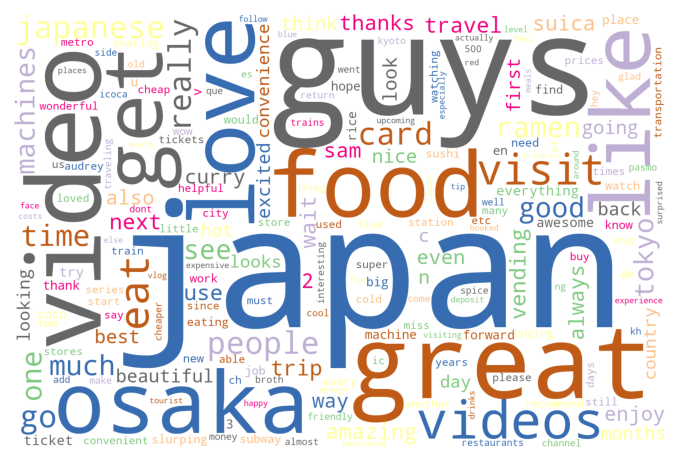

In [73]:
# word cloud 
import matplotlib
matplotlib.rc('font', family='D2coding')
set_matplotlib_formats('retina')
matplotlib.rc('axes', unicode_minus = False)

wordcloud = WordCloud(
background_color='white',colormap = "Accent_r", width=1500, \
height=1000).generate_from_frequencies(word)
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

In [ ]:


fhand = open('lyrics.txt')
lyrics = ''

for line in fhand:
    if line == '' :
        continue
    line = line.replace('(', '').replace(')', '')
    lyrics = lyrics + line
    
lyrics = lyrics.split() 

counts = dict()
for word in lyrics:
   counts[word] = counts.get(word,0) + 1

counts_val_reverse = sorted(counts.items(), 
    reverse=True, 
    key=lambda item: item[1])

for key, value in counts_val_reverse:
    print(key, ":", value)

In [10]:
# 연습 : 한글, 영어 구분하기 
word = '한글a'
for i in word:
    if i.encode().isalpha():
        print("it is alpha",i)
    
    else:
        print("it is not alpha",i)

it is not alpha 한
it is not alpha 글
it is alpha a
